In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [4]:
file_path = "/content/indian_healthcare_data_main.csv"
df = pd.read_csv(file_path)

df.head()

,condition,city,hospital_type,room_type,age,actual_cost
0,cardiac_surgery,Chennai,private,general_ward,39,1.176642e+06
1,typhoid,Delhi,private,private,30,1.691975e+05
2,cardiac_surgery,Pune,government,semi_private,59,8.517403e+05
3,typhoid,Hyderabad,government,general_ward,45,1.769994e+04
4,cataract_surgery,Jaipur,private,general_ward,23,5.698157e+04


In [5]:
df.shape
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   condition      10000 non-null  object 
 1   city           10000 non-null  object 
 2   hospital_type  10000 non-null  object 
 3   room_type      10000 non-null  object 
 4   age            10000 non-null  int64  
 5   actual_cost    10000 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


,0
condition,0
city,0
hospital_type,0
room_type,0
age,0
actual_cost,0


In [6]:
# Numerical columns
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical columns
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


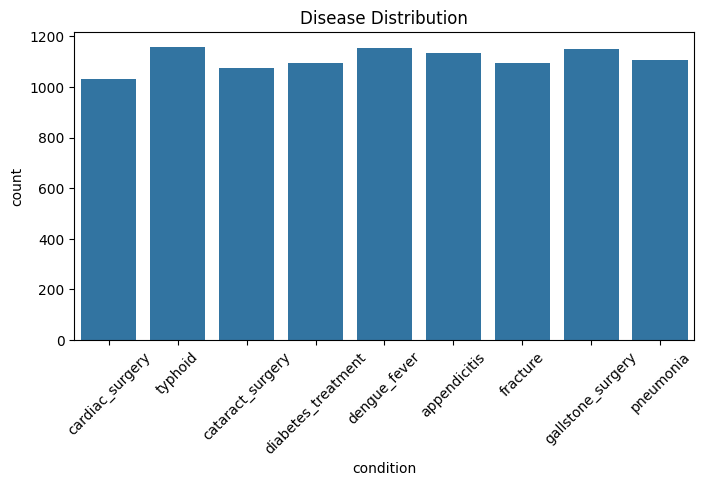

In [8]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['condition'])
plt.xticks(rotation=45)
plt.title("Disease Distribution")
plt.show()

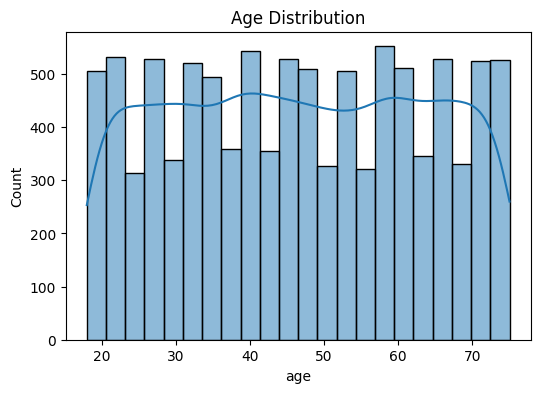

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

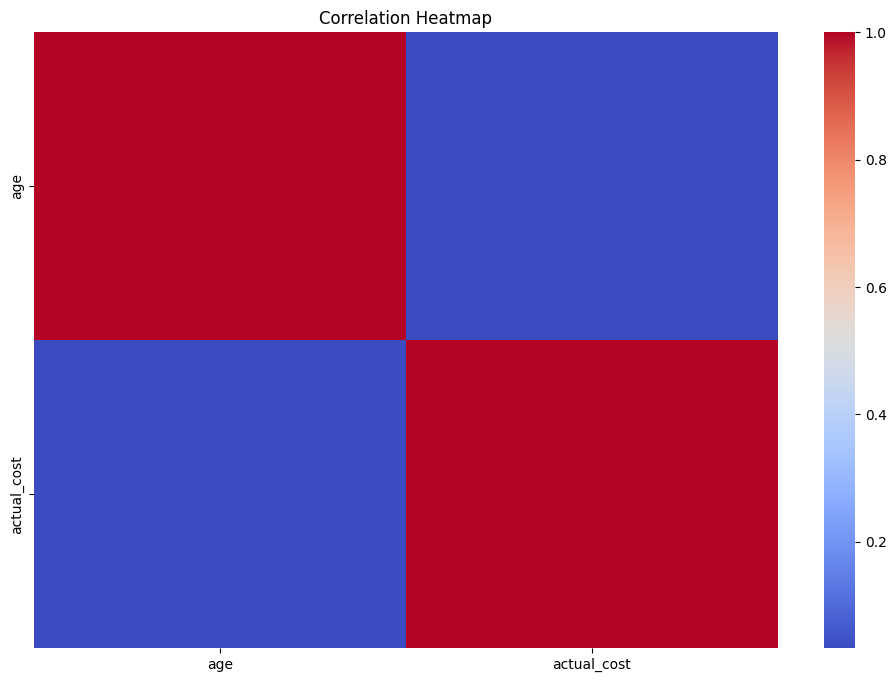

In [11]:
plt.figure(figsize=(12,8))
corr = df[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


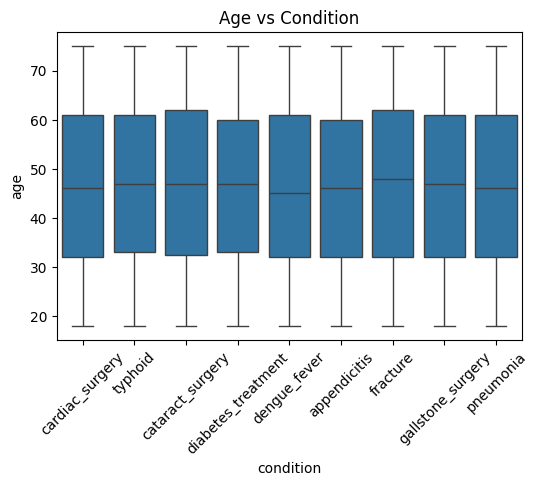

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x='condition', y='age', data=df)
plt.xticks(rotation=45)
plt.title("Age vs Condition")
plt.show()

In [14]:
encoder = LabelEncoder()

for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])


In [18]:
X = df.drop('condition', axis=1)
y = df['condition']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [20]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [22]:
y_pred = model.predict(X_test)


In [23]:
accuracy_score(y_test, y_pred)


0.558

In [24]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.72      0.73       227
           1       1.00      1.00      1.00       206
           2       0.37      0.33      0.35       215
           3       0.27      0.26      0.26       231
           4       0.56      0.59      0.57       219
           5       0.71      0.82      0.76       219
           6       0.78      0.77      0.78       230
           7       0.32      0.31      0.31       221
           8       0.27      0.27      0.27       232

    accuracy                           0.56      2000
   macro avg       0.56      0.56      0.56      2000
weighted avg       0.55      0.56      0.55      2000



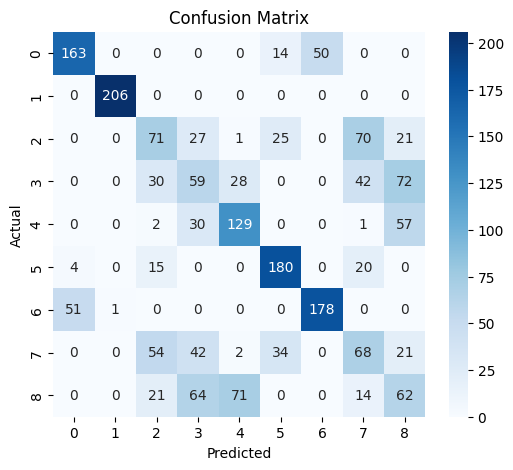

In [25]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


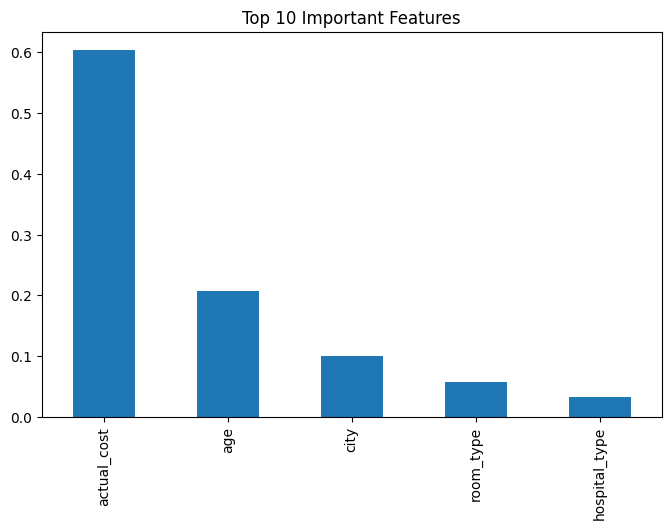

In [26]:
feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,5))
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Important Features")
plt.show()
